<a href="https://colab.research.google.com/github/simulate111/Textual-Data-Analysis-25/blob/main/tda_2025_week2_ex3_solved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Ex1: Translation mining</h1>

In this exercise you will test comparing two texts:

1. The Finnish translation of the *Adventures of Huckleberry Finn* (the whole book)
2. A small section of the English original

In the exercise you should convince yourself that the cross-lingual embedding models can indeed identify the area where the texts match. You can do so by splitting the texts into small overlapping segments, embedding each using a cross-lingual model, comparing the embeddings all against all with cosine similarity, and plotting the results as a heatmap. When splitting the texts, a 2000-character long sliding window with stride of 500 characters worked for me, so you can use that as a reasonable default. The result should look something like the image below. You can clearly see the line where the English text matches the Finnish text. Your job is to replicate this result. :)

For this to work, I suggest you use the model named `paraphrase-xlm-r-multilingual-v1` in the Sentence Transformer library. Most likely you will want to use GPU, but do protect your Colab quota and debug your code on a small sample using CPU while developing, and ony switch to GPU when ready to run the whole thing.

The English text: https://www.gutenberg.org/ebooks/7104.txt.utf-8

The Finnish text: https://www.gutenberg.org/ebooks/47095.txt.utf-8


Expected result (of course the details like color, x and y ranges etc may vary)

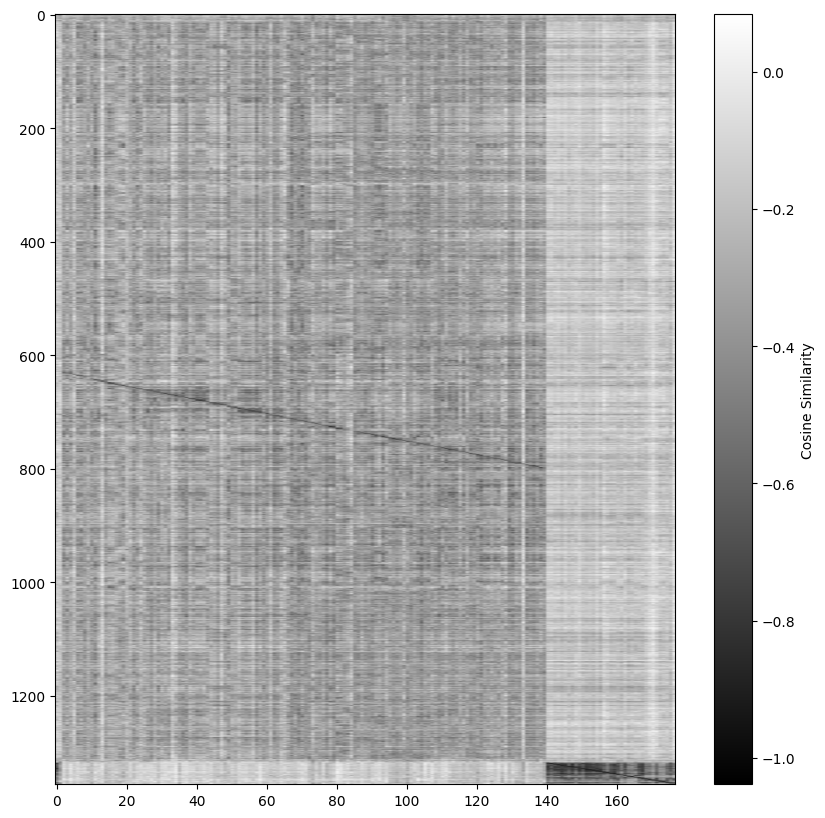

In [1]:
!wget -O fi.txt https://www.gutenberg.org/ebooks/47095.txt.utf-8
!wget -O en.txt https://www.gutenberg.org/ebooks/7104.txt.utf-8

--2025-01-29 09:22:27--  https://www.gutenberg.org/ebooks/47095.txt.utf-8
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://www.gutenberg.org/cache/epub/47095/pg47095.txt [following]
--2025-01-29 09:22:27--  http://www.gutenberg.org/cache/epub/47095/pg47095.txt
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.gutenberg.org/cache/epub/47095/pg47095.txt [following]
--2025-01-29 09:22:27--  https://www.gutenberg.org/cache/epub/47095/pg47095.txt
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 726105 (709K) [text/plain]
Saving to: ‘fi.txt’

fi.txt              100%[===================>] 709.09K  3.5

In [2]:
def get_blocks(txt,stride=500,block_len=2000):
    blocks=[]
    for i in range(0,len(txt),stride):
        blocks.append(txt[i:i+block_len])
    return blocks

fi_blocks=get_blocks(open("fi.txt").read())
en_blocks=get_blocks(open("en.txt").read())


In [3]:
print(len(fi_blocks))
print(len(en_blocks))

1356
177


In [4]:
from sentence_transformers import SentenceTransformer
model_name="paraphrase-xlm-r-multilingual-v1"
#model_name="intfloat/e5-small-v2" ##doesn't work at all, not cross-lingual!
model = SentenceTransformer(model_name)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.78k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/550 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [5]:
%time embeddings_fi=model.encode(fi_blocks)
%time embeddings_en=model.encode(en_blocks)

CPU times: user 8min 21s, sys: 31.8 s, total: 8min 53s
Wall time: 8min 55s
CPU times: user 1min 5s, sys: 4.13 s, total: 1min 9s
Wall time: 1min 9s


In [6]:
print(embeddings_fi.__class__)
print(embeddings_fi.shape)
print(embeddings_en.shape)

<class 'numpy.ndarray'>
(1356, 768)
(177, 768)


In [7]:
import sklearn
all_comp=sklearn.metrics.pairwise.cosine_similarity(embeddings_en,embeddings_fi)
print(all_comp.shape)

(177, 1356)


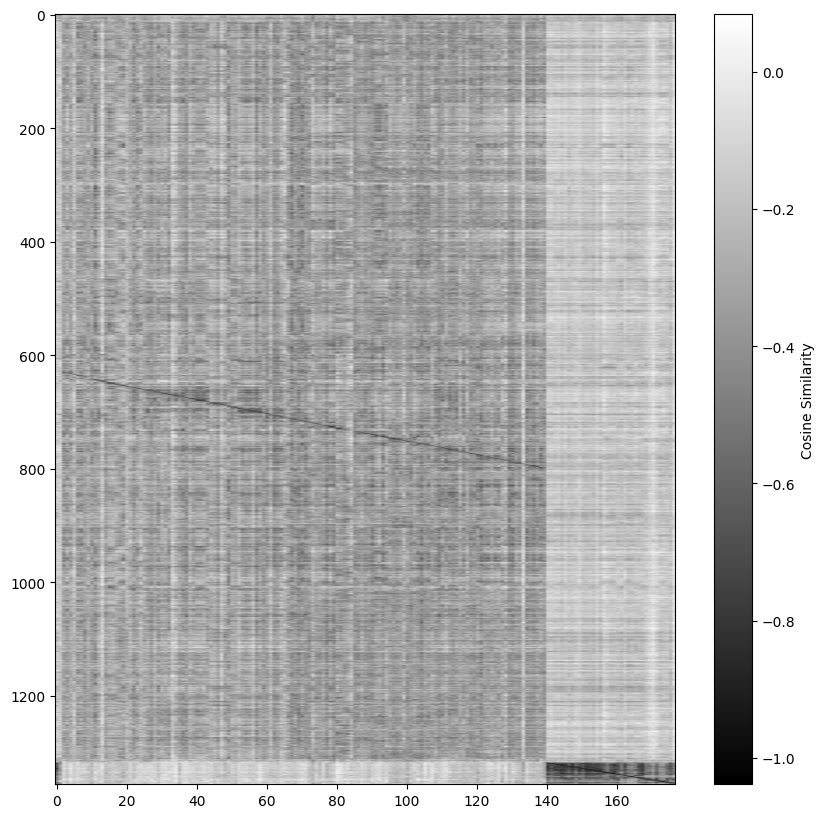

In [8]:
# prompt: plot all_comp as a figure where each point is a pixel and it is a heatmap, grayscale, black is max, white is min

import matplotlib.pyplot as plt
import numpy as np

# Assuming 'all_comp' is already defined from the previous code

plt.figure(figsize=(10, 10))  # Adjust figure size as needed
plt.imshow(-all_comp.T, cmap='gray',vmin=-all_comp.min(), vmax=-all_comp.max(), aspect='auto')
plt.colorbar(label='Cosine Similarity') # Add a colorbar for reference
plt.show()